<a href="https://colab.research.google.com/github/PARTH264/Fake-News-Detection/blob/main/Copy_of_Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import the necessary module from Google Colab to handle file uploads
from google.colab import files

# Open a file upload dialog in Google Colab to allow users to upload files
uploaded_files = files.upload()

Saving kaggle.json to kaggle.json


In [1]:
# Import the necessary module from Google Colab to handle file uploads
from google.colab import files

# Open a file upload dialog in Google Colab to allow users to upload files
uploaded_files = files.upload()

MessageError: CustomError: Timed out waiting for output iframe load.

In [4]:
# Create a hidden directory named '.kaggle' in the home directory if it doesn't already exist
!mkdir -p ~/.kaggle

# Move the 'kaggle.json' file (which contains API credentials) into the '.kaggle' directory
!mv kaggle.json ~/.kaggle/

# Set appropriate permissions for the 'kaggle.json' file to keep it secure
# This ensures that only the owner can read and write the file (600 permission)
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory


In [5]:
# Use the Kaggle API to download the dataset from Kaggle
# The dataset ID 'saurabhshahane/fake-news-classification' refers to a Fake News Classification dataset
!kaggle datasets download -d saurabhshahane/fake-news-classification

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification
License(s): Attribution 4.0 International (CC BY 4.0)


In [6]:
# Unzip the downloaded dataset (fake-news-classification.zip) to extract its contents
!unzip fake-news-classification.zip

Archive:  fake-news-classification.zip
  inflating: WELFake_Dataset.csv     


In [7]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd  # For data handling and analysis
import seaborn as sns  # For advanced data visualization (statistical plots)
import matplotlib.pyplot as plt  # For general plotting (line plots, scatter plots, etc.)

# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('/content/WELFake_Dataset.csv')  # Make sure the file path is correct for your environmenty

In [8]:
# Display the first five rows of the dataset to get a quick overview of the data
df.head()  # This shows the first five rows of the DataFrame `df`

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [9]:
# Display a summary of the DataFrame, including column names, non-null counts, and data types
df.info()  # This provides a concise summary of the DataFrame, including memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [10]:
# Check for missing (NaN) values in the dataset and get the total count of missing values per column
df.isna().sum()  # This returns the number of missing values (NaN) for each column in the DataFrame

,0
Unnamed: 0,0
title,558
text,39
label,0


In [11]:
# Check for duplicate rows in the DataFrame and count how many duplicates exist
duplicates = df.duplicated().sum()  # 'duplicated()' returns a Boolean Series where True represents duplicate rows
print(f"Number of duplicate rows: {duplicates}")  # Print the number of duplicate rows

Number of duplicate rows: 0


In [12]:
# Check for duplicate rows in the DataFrame and count the total number of duplicates
duplicates = df.duplicated().sum()  # This counts the number of duplicated rows in the DataFrame
print(f"Number of duplicate rows: {duplicates}")  # Print the number of duplicate rows

# Fill missing values in the 'title' and 'text' columns with an empty string
df["title"].fillna("", inplace=True)  # Replace NaN values in the 'title' column with an empty string
df["text"].fillna("", inplace=True)   # Replace NaN values in the 'text' column with an empty string

# Check again for missing values after filling the 'title' and 'text' columns
df.isna().sum()  # Returns the number of missing values (NaN) per column in the DataFrame


Number of duplicate rows: 0


<ipython-input-12-c7893976dad3>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["title"].fillna("", inplace=True)  # Replace NaN values in the 'title' column with an empty string
<ipython-input-12-c7893976dad3>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

,0
Unnamed: 0,0
title,0
text,0
label,0


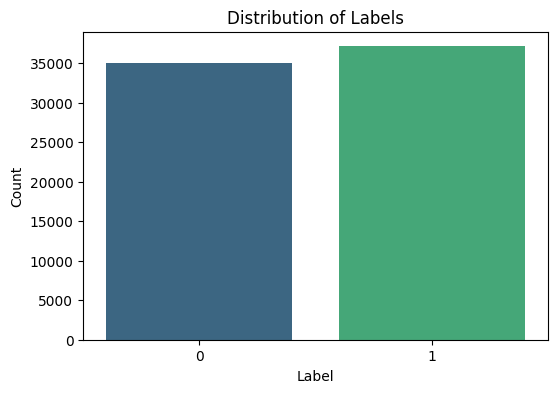

Label Counts:
 label
1    37106
0    35028
Name: count, dtype: int64


In [13]:
# Count the occurrences of each label in the 'label' column of the DataFrame
label_counts = df["label"].value_counts()  # This will return the count of each unique value in the 'label' column

# Set up the plot size
plt.figure(figsize=(6, 4))  # Defines the size of the plot (width x height)

# Create a barplot to visualize the distribution of labels
ax = sns.barplot(x=label_counts.index,  # x-axis: the unique labels
                 y=label_counts.values,  # y-axis: the count of each label
                 hue=label_counts.index,  # Color the bars based on the label
                 dodge=False,  # Combine bars for each label (instead of separate bars)
                 palette="viridis",  # Color palette for the bars
                 legend=False)  # Hide the legend

# Add labels and title to the plot
plt.xlabel("Label")  # Label for the x-axis
plt.ylabel("Count")  # Label for the y-axis
plt.title("Distribution of Labels")  # Title of the plot
plt.xticks(rotation=0)  # Ensure that x-axis labels are horizontal
plt.show()  # Display the plot

# Print the counts of each label
print("Label Counts:\n", label_counts)  # Display the value counts of the labels


# **Text Preprocessing and Cleaning Pipeline**


In [14]:
# Importing necessary libraries for text processing, natural language processing (NLP), and visualization

import re  # Regular expressions for text cleaning and pattern matching
from nltk.corpus import stopwords  # To access a list of common stopwords for text processing
from nltk.tokenize import word_tokenize  # For splitting text into individual words (tokenization)
from nltk.stem import WordNetLemmatizer  # For lemmatizing words (reducing them to their base form)
from textblob import TextBlob  # For sentiment analysis and text manipulation
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
from wordcloud import WordCloud  # For generating word clouds from text data
from sklearn.feature_extraction.text import CountVectorizer  # For converting text data into a matrix of token counts

In [15]:
lemmatizer = WordNetLemmatizer()

# Download NLTK resources
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # 1: Lowercasing
    text = text.lower()

    # 2: Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 3: Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # 4: Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # 6: Tokenization
    tokens = word_tokenize(text)

    # 6: Lemmatization
    text = ' '.join([lemmatizer.lemmatize(word) for word in tokens])

    # 7: Remove URLs, mentions, and hashtags
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)

    # 8: Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    return text
df['cleaned_text'] = df['text'].apply(lambda x: clean_text(x))

print(df[['text', 'cleaned_text']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                                text  \
0  No comment is expected from Barack Obama Membe...   
1     Did they post their votes for Hillary already?   
2   Now, most of the demonstrators gathered last ...   
3  A dozen politically active pastors came here f...   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...   

                                        cleaned_text  
0  comment expected barack obama member fyf fukyo...  
1                          post vote hillary already  
2  demonstrator gathered last night exercising co...  
3  dozen politically active pastor came private d...  
4  r sarmat missile dubbed satan replace s fly mi...  


# **Word Cloud Visualization of Cleaned Text Data**

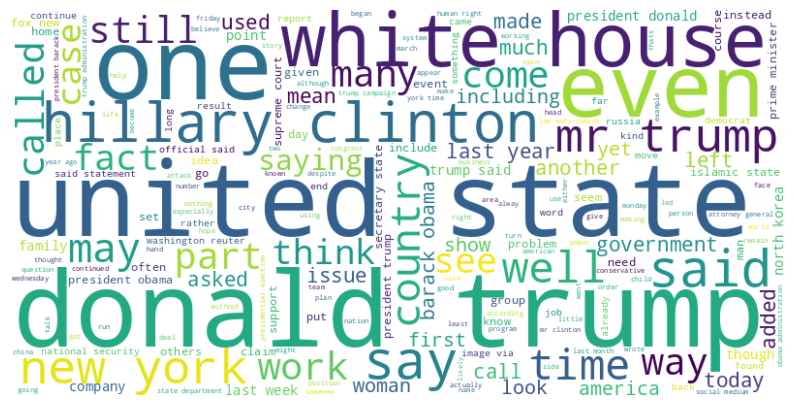

In [16]:
# Join all the cleaned text from the 'cleaned_text' column into a single string
# This creates a single string of all text data combined, with each piece of text separated by a space
all_text = ' '.join(df['cleaned_text'])

# Generate the word cloud using the WordCloud class
# Width and height set the size of the word cloud image
# background_color='white' sets the background color of the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Set up the plot size
plt.figure(figsize=(10, 6))

# Display the word cloud using imshow, which shows an image
# interpolation='bilinear' ensures the image is smoothly displayed
plt.imshow(wordcloud, interpolation='bilinear')

# Remove the axes of the plot (we don't need them for a word cloud)
plt.axis('off')

# Display the word cloud
plt.show()


# **Bag of Words (BoW) Feature Extraction**

In [17]:
# Initialize CountVectorizer with a maximum of 1000 features (words)
# This will only consider the top 1000 most frequent words in the cleaned text
count_vectorizer = CountVectorizer(max_features=1000)

# Fit the CountVectorizer to the 'cleaned_text' column and transform the text into a Bag of Words (BoW) representation
# This will return a sparse matrix where each row represents a text document (row in the DataFrame)
# and each column represents a word from the vocabulary with the frequency of that word in the document
bow_features = count_vectorizer.fit_transform(df['cleaned_text'])

# Convert the sparse matrix into a dense matrix and then into a DataFrame
# The columns of this DataFrame will be the words from the vocabulary, and the values will be the word frequencies in the documents
bow_df = pd.DataFrame(bow_features.toarray(), columns=count_vectorizer.get_feature_names_out())

# Display the first few rows of the Bag of Words DataFrame
# This shows the top 1000 words and their frequencies for the first few documents in the DataFrame
print("Bag of Words Features:\n", bow_df.head())

# Join the BoW features back to the original DataFrame
# Each word from the vocabulary will be added as a new column in the original DataFrame
# The 'rsuffix="_bow"' ensures that the new columns are named based on the word, with a '_bow' suffix
df = df.join(bow_df, rsuffix='_bow')

# Display the first few rows of the updated DataFrame which now contains both the original data and the new Bag of Words features
print(df.head())

Bag of Words Features:
    ability  able  access  according  account  accused  across  act  action  \
0        0     0       0          0        0        0       0    0       0   
1        0     0       0          0        0        0       0    0       0   
2        0     0       0          0        0        0       0    0       0   
3        0     0       0          0        0        0       0    1       3   
4        0     1       0          1        0        0       0    0       0   

   activist  ...  would  wrong  wrote  year  yearold  yes  yet  york  young  \
0         0  ...      2      0      0     0        0    0    0     0      1   
1         0  ...      0      0      0     0        0    0    0     0      0   
2         0  ...      0      0      0     0        0    0    0     0      0   
3         4  ...      4      0      0     4        0    0    1     0      1   
4         0  ...      1      0      0     0        0    0    0     0      0   

   youre  
0      0  
1      0  

In [18]:
# Print the column names of the bow_df DataFrame
# This will show the top 1000 words that were extracted from the cleaned text
print("Columns in bow_df:", bow_df.columns)

# Print the data types of each column in the bow_df DataFrame
# Since the word frequencies are numeric, all columns should have the data type 'int64' or 'float64'
print("Data types of bow_df:\n", bow_df.dtypes)


Columns in bow_df: Index(['ability', 'able', 'access', 'according', 'account', 'accused',
       'across', 'act', 'action', 'activist',
       ...
       'would', 'wrong', 'wrote', 'year', 'yearold', 'yes', 'yet', 'york',
       'young', 'youre'],
      dtype='object', length=1000)
Data types of bow_df:
 ability      int64
able         int64
access       int64
according    int64
account      int64
             ...  
yes          int64
yet          int64
york         int64
young        int64
youre        int64
Length: 1000, dtype: object


In [19]:
# Importing train_test_split from sklearn.model_selection to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Importing LogisticRegression from sklearn.linear_model to use logistic regression as a classification model
from sklearn.linear_model import LogisticRegression

# Importing accuracy_score and classification_report to evaluate the performance of the model
from sklearn.metrics import accuracy_score, classification_report

# Importing confusion_matrix to evaluate the model's performance using a confusion matrix
from sklearn.metrics import confusion_matrix


In [20]:
# Drop the columns that are not needed for the feature set (title, text, label, cleaned_text)
# 'X' will contain all the features (BoW features and others) for training the model
X = df.drop(columns=['title', 'text', 'label', 'cleaned_text'])

# Join the BoW features to the feature set 'X'
# 'bow_df' contains the top 1000 most frequent words from the cleaned text,
# and 'add_suffix('_bow')' ensures that each word column is named with the '_bow' suffix
X = X.join(bow_df.add_suffix('_bow'), how='inner')

# Assign the 'label' column to 'y', which will be the target variable (the class labels)
y = df['label']

# Split the data into training and testing sets
# The 'test_size=0.2' means 20% of the data will be used for testing, and the rest will be used for training
# 'random_state=42' ensures the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Print the shape (dimensions) of the X_train dataset
# This will show the number of samples (rows) and the number of features (columns) in the training data
print("Shape of X_train:", X_train.shape)

# Print the shape (dimensions) of the X_test dataset
# This will show the number of samples (rows) and the number of features (columns) in the testing data
print("Shape of X_test:", X_test.shape)

# Print the shape (dimensions) of the y_train dataset
# This will show the number of training labels (rows), which should be the same as the number of samples in X_train
print("Shape of y_train:", y_train.shape)

# Print the shape (dimensions) of the y_test dataset
# This will show the number of testing labels (rows), which should be the same as the number of samples in X_test
print("Shape of y_test:", y_test.shape)


Shape of X_train: (57707, 2001)
Shape of X_test: (14427, 2001)
Shape of y_train: (57707,)
Shape of y_test: (14427,)


# **Machine learning Models**

In [28]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df['cleaned_text'] = df['text'].apply(lambda x: clean_text(x))

count_vectorizer = CountVectorizer(max_features=1000)

# Transform the cleaned text into a bag-of-words representation
bow_features = count_vectorizer.fit_transform(df['cleaned_text'])

# Prepare data for training
X = bow_features
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Save the model and the vectorizer
joblib.dump(log_reg_model, 'log_reg_model.pkl')  # Save model
joblib.dump(count_vectorizer, 'count_vectorizer.pkl')  # Save vectorizer

# Evaluate the model
y_pred = log_reg_model.predict(X_test)
print("Accuracy of Logistic Regression model:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy of Logistic Regression model: 0.9374090247452693

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      7089
           1       0.93      0.95      0.94      7338

    accuracy                           0.94     14427
   macro avg       0.94      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427



In [29]:
import joblib
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load the trained model and vectorizer
log_reg_model = joblib.load('log_reg_model.pkl')
count_vectorizer = joblib.load('count_vectorizer.pkl')

# Define the clean_text function for preprocessing
def clean_text(text):
    # 1: Lowercasing
    text = text.lower()

    # 2: Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 3: Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # 4: Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # 6: Tokenization
    tokens = word_tokenize(text)

    # 6: Lemmatization
    text = ' '.join([lemmatizer.lemmatize(word) for word in tokens])

    # 7: Remove URLs, mentions, and hashtags
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)

    # 8: Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    return text

# 3. Preprocess the new paragraphs
new_paragraphs = [
    "Change isn’t going to be handed to us from the  http #elite power brokers and donors controlling the political parties that got us here, and it sure won’t come from the same oligarchs and zealots pillaging and plundering our societies, our democratic institutions, our economy, and our planet. If we expect to see a future that’s still worth living in, then poor, working-class, and oppressed people across the global underclass will need to fight for it. And TRNN will be there on the front lines of the fight with cameras and microphones."
]

# Clean the new paragraphs
cleaned_paragraphs = [clean_text(paragraph) for paragraph in new_paragraphs]

# Transform the cleaned paragraphs into feature vectors using CountVectorizer
new_bow_features = count_vectorizer.transform(cleaned_paragraphs)

# 4. Make predictions using the logistic regression model
new_predictions = log_reg_model.predict(new_bow_features)

# 5. Print the predictions
for i, paragraph in enumerate(new_paragraphs):
    print(f"Paragraph: {paragraph}")


# Check training vs test accuracy
train_predictions = log_reg_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, train_predictions))

test_predictions = log_reg_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, test_predictions))


Paragraph: Change isn’t going to be handed to us from the  http #elite power brokers and donors controlling the political parties that got us here, and it sure won’t come from the same oligarchs and zealots pillaging and plundering our societies, our democratic institutions, our economy, and our planet. If we expect to see a future that’s still worth living in, then poor, working-class, and oppressed people across the global underclass will need to fight for it. And TRNN will be there on the front lines of the fight with cameras and microphones.
Training Accuracy: 0.9450846517753478
Test Accuracy: 0.9374090247452693


In [28]:
def predict_paragraphs(paragraphs):
    cleaned_paragraphs = [clean_text(paragraph) for paragraph in paragraphs]
    new_bow_features = count_vectorizer.transform(cleaned_paragraphs)

    # Make predictions
    new_predictions = log_reg_model.predict(new_bow_features)

    # Print predictions
    for i, paragraph in enumerate(paragraphs):
        print(f"Paragraph: {paragraph}")
        print(f"Cleaned: {cleaned_paragraphs[i]}")
        print(f"Prediction: {new_predictions[i]}\n")

predict_paragraphs(new_paragraphs)

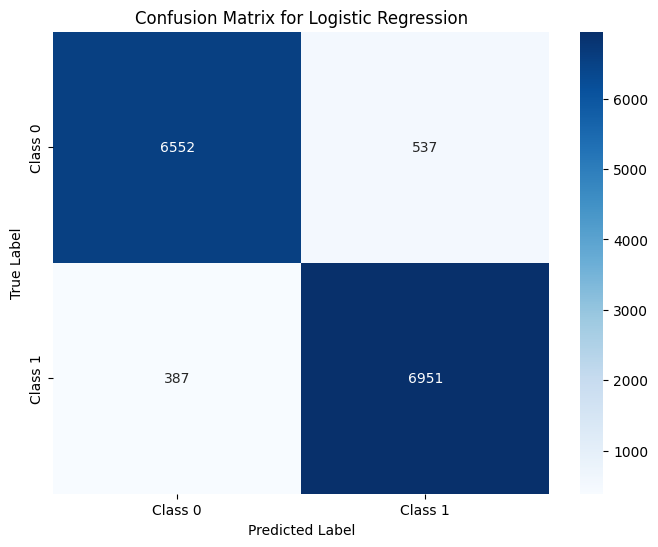

In [24]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

RANDOM FOREST

In [25]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest model:", accuracy_rf)

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", cm_rf)

Accuracy of Random Forest model: 0.9486379704720316

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      7089
           1       0.94      0.97      0.95      7338

    accuracy                           0.95     14427
   macro avg       0.95      0.95      0.95     14427
weighted avg       0.95      0.95      0.95     14427


Confusion Matrix:
 [[6599  490]
 [ 251 7087]]


In [ ]:
import joblib
from google.colab import drive
drive.mount('/content/drive')

# Save model to Google Drive
joblib.dump(rf_model, '/content/drive/MyDrive/random_forest_model.pkl')

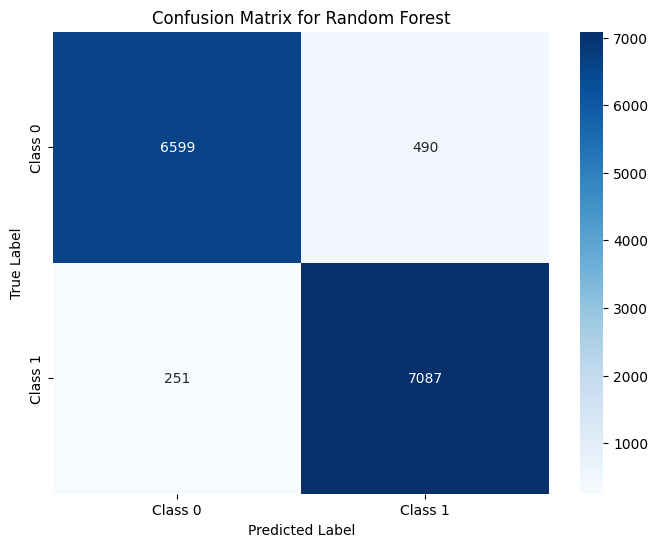

In [26]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **Deep Learning Models**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import numpy as np

# reshape the BoW features to have an additional dimension to represent time steps
X_train_reshaped = np.expand_dims(X_train, axis=-1)
X_test_reshaped = np.expand_dims(X_test, axis=-1)

# Build the LSTM model with reduced complexity
model = Sequential()

# Adding an LSTM layer with fewer units
model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], 1)))
# Adding a Dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with fewer epochs and a smaller batch size
history = model.fit(X_train_reshaped, y_train, epochs=3, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

# Evaluate the model
y_pred = model.predict(X_test_reshaped)
y_pred = (y_pred > 0.5).astype('int32')

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of LSTM model on BoW features:", accuracy)

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix for LSTM Model on BoW Features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

IndexError: tuple index out of range

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive

model.save('/content/drive/MyDrive/lstm_model.h5')  # Save to Drive


# **Comparison**